In [16]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

<h1>Dataset Preprocessing</h1>
<hr>
<h2> - 유사 One-Hot-Encoding 준비

In [2]:
myMusic = pd.read_csv('./myMusic.csv')
allGenre = pd.read_csv('./allGenre.csv')

my_genre = myMusic['genre']
all_genre = allGenre['장르']

print(my_genre)
print(all_genre)

genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(my_genre))]
genre_ohe

0              발라드
1              발라드
2         R&B/Soul
3        발라드, 인디음악
4             랩/힙합
5              발라드
6              발라드
7              발라드
8               댄스
9             랩/힙합
10              댄스
11             발라드
12            록/메탈
13       발라드, 인디음악
14    인디음악, 포크/블루스
15             발라드
16             발라드
17      발라드, 국내드라마
18             발라드
19          포크/블루스
20             발라드
21        R&B/Soul
22             발라드
23             발라드
24             발라드
25             발라드
26             발라드
27             발라드
28             발라드
29             발라드
30             발라드
31             발라드
32             발라드
33             발라드
34             발라드
35             발라드
36             발라드
37          포크/블루스
38             POP
39             발라드
40              댄스
41             발라드
42             발라드
43             발라드
44        R&B/Soul
45       발라드, 인디음악
46    인디음악, 포크/블루스
47       발라드, 인디음악
48    인디음악, 포크/블루스
49             POP
Name: genre, dtype: object
0         OST
1        

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

<h2> - 장르별 유사 One-Hot-Encoding</h2>
<hr>발라드, 인디음악 -> 과 같이 여러개일 경우 해당하는 값에 모두 1처리하고 나중에 가중치를 다르게 매길 것이기 때문에 유사 One-Hot-Encoding

In [3]:
for idx,gen in enumerate(my_genre):
    l_gen = gen.split(', ')
    if len(l_gen) > 1:
        for t_gen in l_gen:
            genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
    else:
        genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1
    print(genre_ohe[idx],end='\t')
    print(gen)
print(len(genre_ohe))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	발라드
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	발라드
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [4]:
sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_myGenre = sumArray

In [5]:
my_preference = (sumArray - np.mean(sumArray,axis = 0))/ np.std(sumArray,axis = 0)
print(my_preference)

[-0.15293797 -0.15293797 -0.15293797 -0.15293797  0.77260045 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797  0.77260045 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797  0.15557484 -0.15293797  0.15557484 -0.15293797
 10.33649753 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797  1.38962607 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797  0.46408764 -0.15293797 -0.15293797 -0.15293797
 -0.15293797 -0.15293797 -0.15293797 -0.15293797 -0

In [6]:
my_preference = (sumArray - np.min(sumArray,axis = 0)) / (np.max(sumArray,axis = 0) - np.min(sumArray,axis = 0))
print(my_preference)

[0.         0.         0.         0.         0.08823529 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.08823529 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02941176 0.         0.02941176 0.
 1.         0.         0.         0.         0.         0.
 0.         0.14705882 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05882353 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05882353 0.         0.         0.
 0.         0.         0.         0.         0.         

In [22]:
def genre_cnt(genre):
    genre = genre.to_dict()
    new_dict = {}
    for gen in genre.values():
        try : new_dict[gen] += 1
        except : new_dict[gen] = 1
    return new_dict
    
def art_cnt(artist):
    artist = artist.to_dict()
    new_dict = {}
    for art in artist.values():
        try : new_dict[art] += 1
        except : new_dict[art] = 1
    return new_dict

my_artist = myMusic['artist']
my_artist = art_cnt(my_artist)
print(my_artist)

# artist_ohe = [[0 for _ in range(len(my_artist))]for _ in range(len(my_artist))]

# for idx,art in enumerate(my_artist):
#     artist_ohe[idx][idx] = my_artist[art]

# artist_ohe

{'정승환': 7, '성시경': 18, 'SG 워너비': 1, '진민호': 1, 'MC몽': 2, '라붐 (LABOUM)': 1, '방탄소년단': 1, '엠씨더맥스 (M.C the MAX)': 1, '윤한솔': 1, '그_냥': 1, '케이시 (Kassy)': 1, '제이세라': 1, '임정희': 1, '장범준': 1, '폴킴': 2, 'Etham': 1, '경서': 1, '성시경, 아이유': 1, '정은지': 1, '브라운 아이드 소울': 1, '새봄 (saevom)': 2, '이민혁': 1, '김댕': 1, "Ghost Town DJ's": 1}
{'발라드': 29, 'R&B/Soul': 3, '발라드, 인디음악': 4, '랩/힙합': 2, '댄스': 3, '록/메탈': 1, '인디음악, 포크/블루스': 3, '발라드, 국내드라마': 1, '포크/블루스': 2, 'POP': 2}


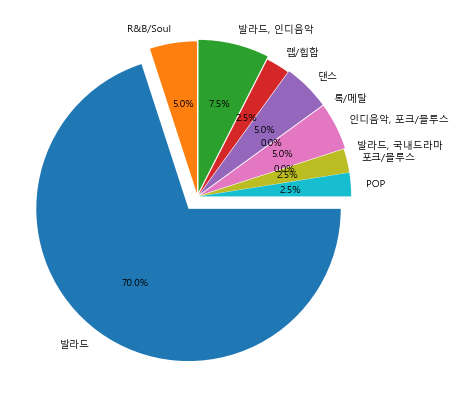

In [8]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (7,7))
genreCnt = {}

for g in myMusic['genre']:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
    
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.show()

<h1>cor DayChart</h1>

In [9]:
if 'DayChart' in os.listdir():
    try:
        dayChart = os.listdir('DayChart')
        print(dayChart[1:])
        
        #사용자로부터 파일 날짜 입력 받기
        input_dayChart = input("원하는 날짜 입력 (ex:20210720): ")
        match = re.search(r'\d{4}\d{2}\d{2}', input_dayChart)
        date = datetime.strptime(match.group(), '%Y%m%d').date()
        year = '{:=04}'.format(date.year)
        month = '{:=02}'.format(date.month)
        day = '{:=02}'.format(date.day)
        
        dayListF = year+month+day+'.csv'
        dayList = pd.read_csv('./DayChart/'+dayListF)
        
        print(dayList)

    except Exception as e:
        print(e)
else:
    pass

['20210720.csv']
원하는 날짜 입력 (ex:20210720): 20210720
     no                title         artist genre
0     1               바라만 본다  MSG워너비(M.O.M)   발라드
1     2           Next Level          aespa    댄스
2     3                  신호등            이무진  록/메탈
3     4               Butter          방탄소년단    댄스
4     5  Permission to Dance          방탄소년단    댄스
..  ...                  ...            ...   ...
95   96        오늘따라 더 미운 그대가            전상근   발라드
96   97            Love poem            아이유  록/메탈
97   98      Don't Start Now       Dua Lipa   POP
98   99     잡아줄게 (Carabiner)     ASH ISLAND  랩/힙합
99  100      과제곡 (교수님 죄송합니다)            이무진  록/메탈

[100 rows x 4 columns]


In [10]:
dayListGenre = dayList['genre']
genre_ohe = [[0 for _ in range(len(all_genre))] for _ in range(len(dayListGenre))]
for idx,gen in enumerate(dayListGenre):
    l_gen = gen.split(', ')
    if len(l_gen) > 1:
        for t_gen in l_gen:
            genre_ohe[idx][all_genre[all_genre == t_gen].index[0]] = 1
    else:
        genre_ohe[idx][all_genre[all_genre == gen].index[0]] = 1

sumArray = np.zeros(len(genre_ohe[0]))
for i in genre_ohe:
    sumArray += np.array(i)
sumArray_dayListGenre = sumArray

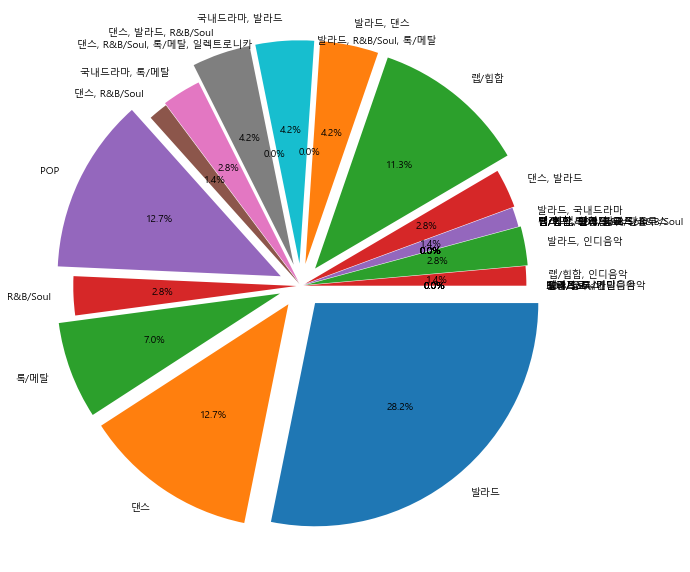

In [11]:
plt.rcParams['font.family'] = "Malgun Gothic"
plt.figure(figsize = (10,15))
genreCnt = {}

for g in dayListGenre:
    try : genreCnt[g] += 1
    except : genreCnt[g] = 0
      
labels = list(genreCnt.keys())
ratio = list(genreCnt.values())
explode = [ratio[i] * 0.01 for i in range(len(labels))]
for i,v in enumerate(explode):
    if v >= np.mean(ratio)*0.01:
        explode[i] = 0.1

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=0, counterclock=False, explode = explode)
plt.show()

<h1>DayList 장르 개수</h1>

In [37]:
dayListGenreCnt = genre_cnt(dayListGenre)
dayListGenreCnt
columns = list(all_genre.values)
dayListGenreCnt = pd.DataFrame(dayListGenreCnt,columns=columns,index=[0]).dropna(axis=1)
dayListGenreCnt

,댄스,일렉트로니카,R&B/Soul,록/메탈,발라드,POP,랩/힙합,성인가요
0,10,1,3,6,21,10,9,1


In [38]:
myGenreCnt = genre_cnt(my_genre)
print(myGenreCnt)
columns = list(all_genre.values)
myGenreCnt = pd.DataFrame(myGenreCnt,columns=columns,index=[0]).dropna(axis = 1)
myGenreCnt

{'발라드': 29, 'R&B/Soul': 3, '발라드, 인디음악': 4, '랩/힙합': 2, '댄스': 3, '록/메탈': 1, '인디음악, 포크/블루스': 3, '발라드, 국내드라마': 1, '포크/블루스': 2, 'POP': 2}


,댄스,R&B/Soul,록/메탈,발라드,포크/블루스,POP,랩/힙합
0,3,3,1,29,2,2,2


In [50]:
corrGenre = pd.DataFrame(round(myGenreCnt/dayListGenreCnt,2))
corrGenre = corrGenre.dropna(axis = 1)
corrGenre

,POP,R&B/Soul,댄스,랩/힙합,록/메탈,발라드
0,0.2,1.0,0.3,0.22,0.17,1.38


C:\Users\82108\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\82108\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\82108\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82108\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

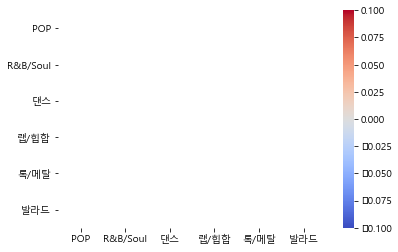

In [51]:
corrGenre = corrGenre.corr()
sns.heatmap(corrGenre,annot=True,linewidths=0.2,cmap='coolwarm')

In [44]:
myGenreCnt.keys()

Index(['댄스', 'R&B/Soul', '록/메탈', '발라드', '포크/블루스', 'POP', '랩/힙합'], dtype='object')